In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes, make_regression
from sklearn.model_selection import train_test_split

## 1. Define model

In [2]:
class MultivariableLinearRegressor(object):
    def __init__(self, alpha: float, epochs: int, rng_seed: int, eps: float = 1e-8):
        self.__alpha = alpha
        self.__epochs = epochs
        self.__eps = eps
        self.__rng = np.random.default_rng(rng_seed) if rng_seed else np.random.default_rng()


    def fit(self, x: np.ndarray, y: np.ndarray) -> list:
        self.__w = self.__rng.random(x.shape[1])
        self.__b = self.__rng.random()

        costs = list()
        prev_cost = 0

        for i in range(self.__epochs):
            y_hat = self.predict(x)
            cost = self._cost(y, y_hat)

            if abs(cost - prev_cost) < self.__eps:
                break

            costs.append(cost)

            if i % (self.__epochs / 10) == 0:
                print(f"Epoch[{i}]: cost: {cost:.5f}")

            dj_dw = self._cost_weight_derivative(y, y_hat, x)
            dj_db = self._cost_bias_derivative(y, y_hat)

            self.__w -= self.__alpha * dj_dw
            self.__b -= self.__alpha * dj_db
        
        return costs

    
    def predict(self, x: np.ndarray) -> float:
        return self._model(x, self.__w, self.__b)


    @staticmethod
    def _model(x: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
        return np.dot(x, w) + b


    @staticmethod
    def _cost(y: np.ndarray, y_hat: np.ndarray) -> float:
        return 0.5 * np.average((y_hat - y) ** 2)


    @staticmethod
    def _cost_weight_derivative(y: np.ndarray, y_hat: np.ndarray, x: np.ndarray) -> np.ndarray:
        return np.average((y_hat - y).reshape(-1, 1) * x, axis=0)


    @staticmethod
    def _cost_bias_derivative(y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.average(y_hat - y)

## 2. Test model on generated dummy data

In [3]:
X, y = make_regression(200, 10, noise=.2, random_state=0)

In [4]:
alpha = 1e-1
epochs = 200

model = MultivariableLinearRegressor(alpha=alpha, epochs=epochs, rng_seed=42)
costs = model.fit(X, y)


Epoch[0]: cost: 8976.47745
Epoch[20]: cost: 111.58302
Epoch[40]: cost: 2.36607
Epoch[60]: cost: 0.09294
Epoch[80]: cost: 0.02177
Epoch[100]: cost: 0.01894
Epoch[120]: cost: 0.01881
Epoch[140]: cost: 0.01880
Epoch[160]: cost: 0.01880
Epoch[180]: cost: 0.01880


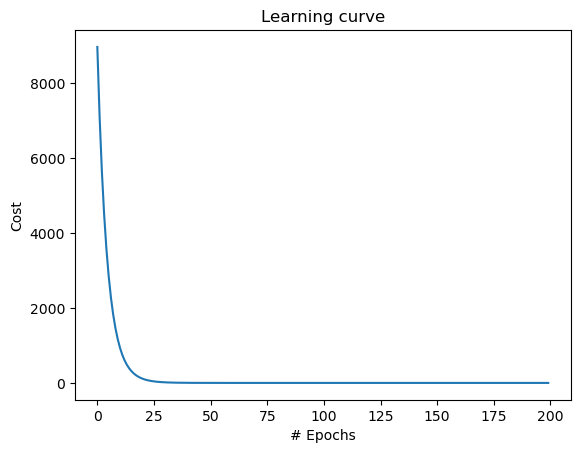

In [5]:
fig, ax = plt.subplots()

ax.plot(np.arange(epochs), costs)

ax.set_ylabel("Cost")
ax.set_xlabel("# Epochs")
ax.set_title("Learning curve")

plt.show()

## 3. Test model on toy dataset

In [6]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

print(X)
print(y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [7]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=0)

print(len(X_train), len(y_train))

331 331


In [8]:
alpha = 1
epochs = 1000

model = MultivariableLinearRegressor(alpha=alpha, epochs=epochs, rng_seed=42)
costs = model.fit(X_train.values, y_train.values)

Epoch[0]: cost: 14605.19263
Epoch[100]: cost: 1982.27844
Epoch[200]: cost: 1693.95512
Epoch[300]: cost: 1575.37020
Epoch[400]: cost: 1510.01359
Epoch[500]: cost: 1470.03999
Epoch[600]: cost: 1444.73481
Epoch[700]: cost: 1428.45513
Epoch[800]: cost: 1417.85662
Epoch[900]: cost: 1410.87933


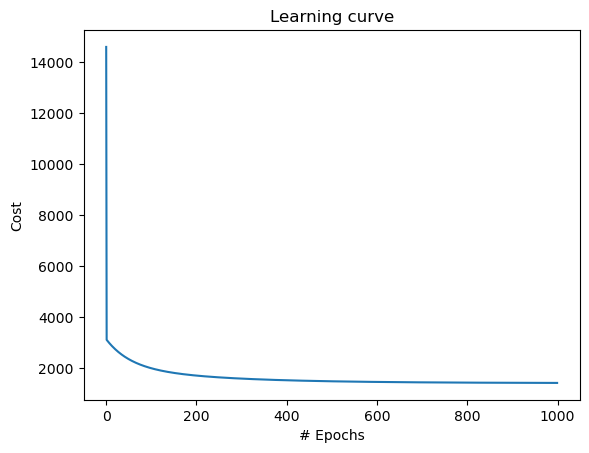

In [9]:
fig, ax = plt.subplots()

ax.plot(np.arange(epochs), costs)

ax.set_ylabel("Cost")
ax.set_xlabel("# Epochs")
ax.set_title("Learning curve")

plt.show()

In [10]:
.5 * np.average((y_test.values - model.predict(X_test.values)) ** 2)

1565.010193020808

In [11]:
def rsquared(y, y_hat):
    return 1 - (np.sum((y - y_hat) ** 2) / np.sum((y - np.mean(y)) ** 2))

In [12]:
dumb_model = MultivariableLinearRegressor(alpha=1, epochs=1, rng_seed=0)
dumb_model.fit(X_train.values, y_train.values)

print(f"R^2 for fitted linear regressor: {rsquared(y_test.values, model.predict(X_test.values))}")
print(f"R^2 for randomly initialized linear regressor: {rsquared(y_test.values, dumb_model.predict(X_test.values))}")

Epoch[0]: cost: 14584.62313
R^2 for fitted linear regressor: 0.3695085388773215
R^2 for randomly initialized linear regressor: 0.007646843928582281
